In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv("dataset_35_dermatology (1).csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3


In [5]:
data["class"].unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)

In [6]:
data["class"].value_counts()

class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64

Assuming class labels are in following order. 
1. psoriasis
2. seboreic dermatitis
3. lichen planus
4. pityriasis rosea
5. cronic dermatitis
6. pityriasis rubra pilaris

In [7]:
data.shape

(366, 35)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [9]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [10]:
data.rename({"Age": "age"}, axis=1, inplace=True)

In [12]:
# This line gives error -- ValueError: Unable to parse string "?" at position 33

# pd.to_numeric(data.age)

In [13]:
data[data.age == '?'].shape

(8, 35)

In [14]:
data["age"] = pd.to_numeric(data.age, errors='coerce', downcast='integer')

In [15]:
data.age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 366 entries, 0 to 365
Series name: age
Non-Null Count  Dtype  
--------------  -----  
358 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


In [16]:
from sklearn.impute import KNNImputer

In [17]:
knn = KNNImputer(n_neighbors=10)
data.age = knn.fit_transform(data[['age']])

In [18]:
data[['age']].isna().sum()

age    0
dtype: int64

- [ ] Data is in-balanced. Need to apply SMOTE to balance data
- [x] Convert Age to numeric data type
- [x] Rename Age column
- [x] Impude nan values of age with mean or KneariestNeighbours

* No missing values
* There are 8 rows where value of age is "?"


In [19]:
data['age'].describe()

count    366.000000
mean      36.296089
std       15.155687
min        0.000000
25%       25.000000
50%       36.000000
75%       48.000000
max       75.000000
Name: age, dtype: float64

## EDA

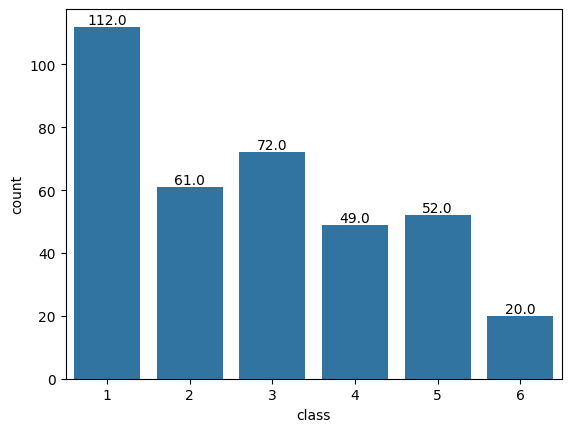

In [20]:
ax = sns.countplot(data=data, x = "class", )
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

Data is inbalanced with class 1(psoriasis) has most number of samples and class 6 (pityriasis rubra pilaris) has least

<Axes: xlabel='age', ylabel='Count'>

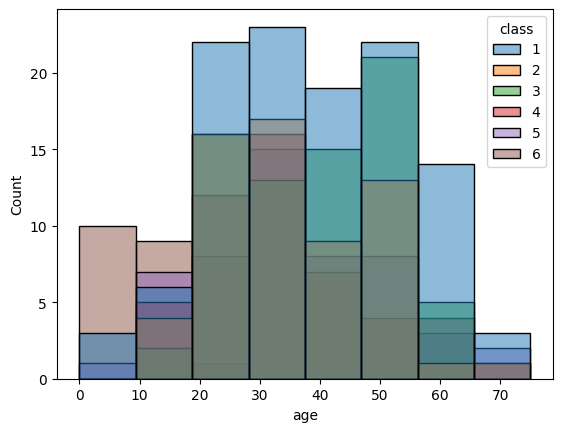

In [21]:
sns.histplot(x = data.age, hue=data["class"], palette= sns.color_palette(), bins=8)

In [22]:
data.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'age', 'class'],
      dtype='object')

<Axes: xlabel='class', ylabel='age'>

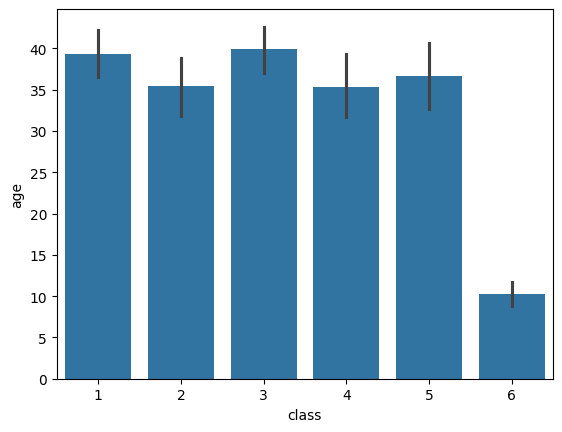

In [23]:
sns.barplot(data=data, x = "class", y = "age")

<Axes: xlabel='class', ylabel='age'>

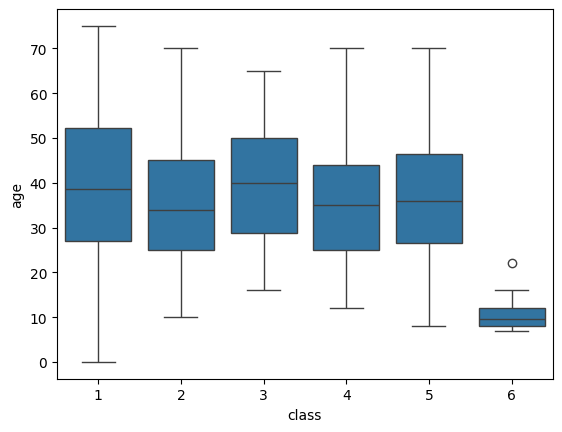

In [24]:
sns.boxplot(data=data, x = "class", y = "age")

pityriasis rubra pilaris is affecting childern of age around 10. But we can see an outlier whose age is 20


#### Relationship b/w Age and Clinical Attributes

In [25]:
clinical_attributes = ['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history']

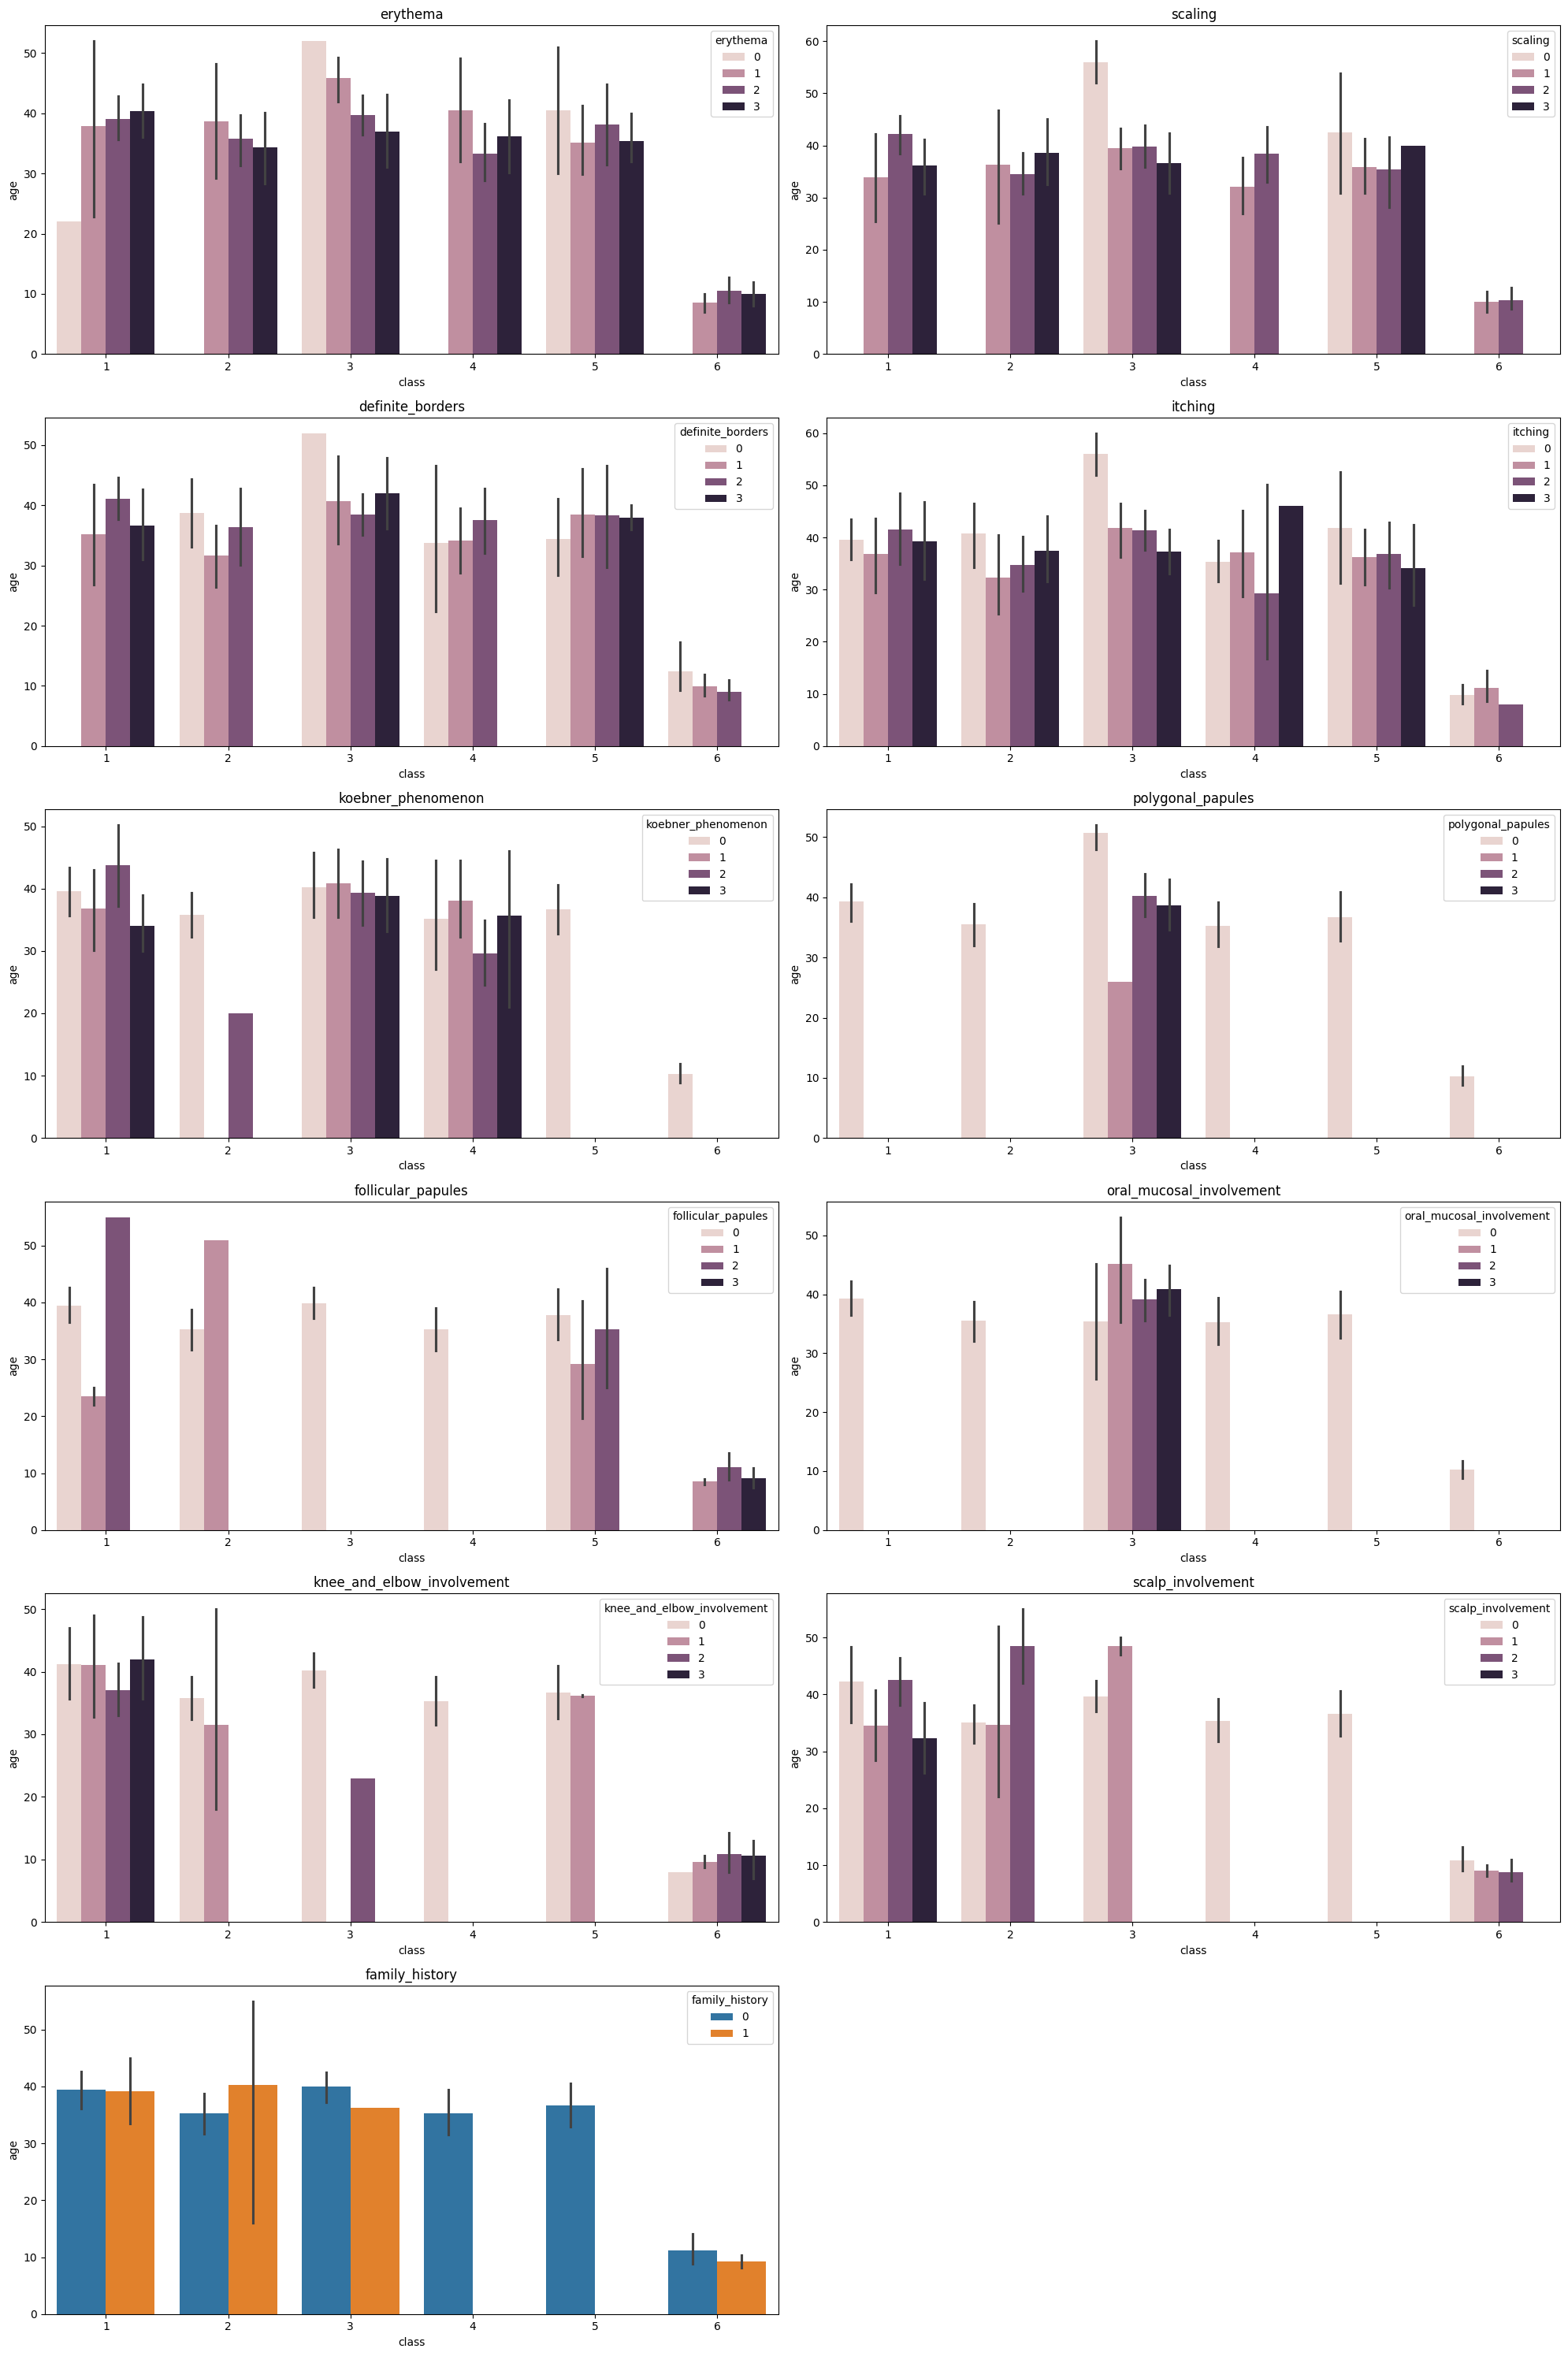

In [26]:
fig = plt.figure(figsize=(20,30))
for i,ele in enumerate(clinical_attributes):
    ax = fig.add_subplot(6,2, i+1)
    ax.set_title(ele)
    sns.barplot(x = data["class"], y=data.age, hue=data[ele])

plt.tight_layout()
plt.show();

* for lichen planus most of the clinical attribute symptoms are not seen. Microscopic reading play important role in this.
* polygonal_papules and oral_mucosal_involvement are the attributes that not seen for any other class except lichen planus
* pityriasis rosea and cronic dermatitis dosent have any instance of family history
* 'erythema', 'scaling', 'definite_borders', 'itching' are the symptoms that are common to all the disorder classes
* for class psoriasis polygonal_papules and oral_mucosal_involvement dosent play major role
* for seboreic dermatitis, there are no extreme symptoms of all attributes except the common attributes
* 

In [199]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=110)

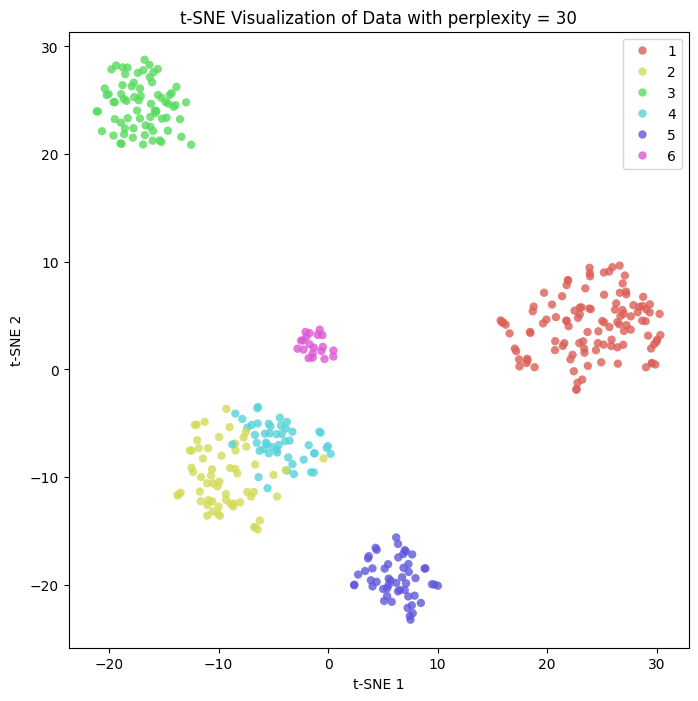

In [200]:
x_tsne = tsne.fit_transform(x)


# Create a scatterplot of the t-SNE graph
plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=x_tsne[:,0], y=x_tsne[:,1],
    hue=y, palette=sns.color_palette("hls", len(np.unique(y))),
    alpha=0.8, edgecolor='none'
)


plt.title('t-SNE Plot for Dermatology Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization of Data with perplexity = 30')
plt.legend(loc='upper right')
plt.show()

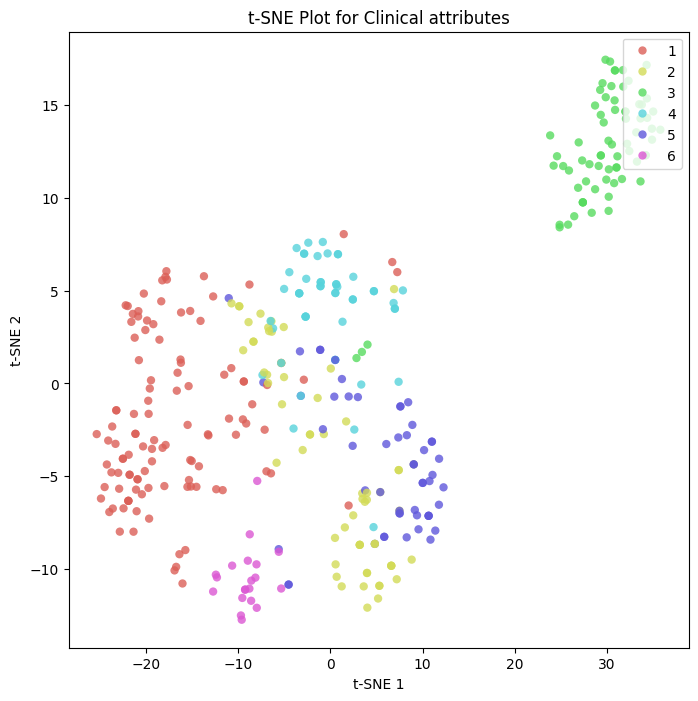

In [201]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=110)
x_tsne = tsne.fit_transform(x[clinical_attributes])


# Create a scatterplot of the t-SNE graph
plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=x_tsne[:,0], y=x_tsne[:,1],
    hue=y, palette=sns.color_palette("hls", len(np.unique(y))),
    alpha=0.8, edgecolor='none'
)


plt.title('t-SNE Plot for Clinical attributes')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(loc='upper right')
plt.show()

In [27]:
microscopic_attributes = list(data.columns)[11:33]

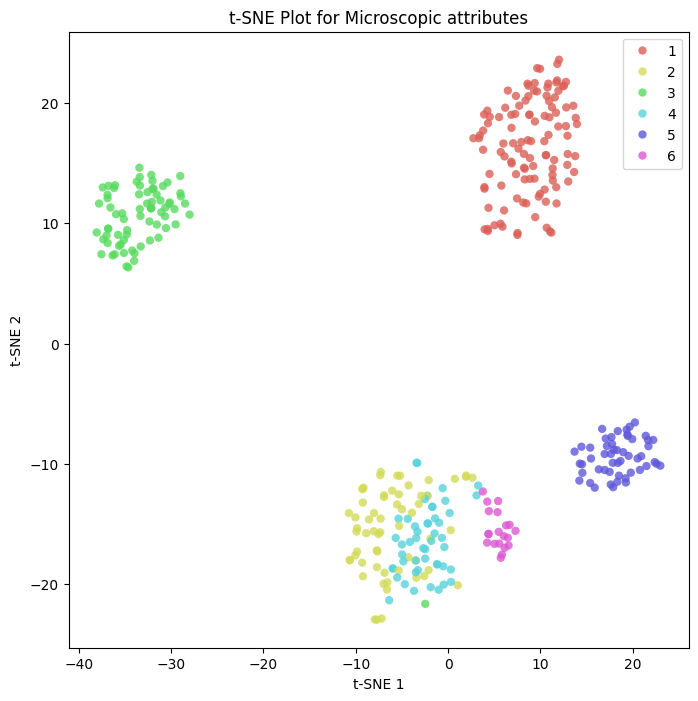

In [202]:
x_tsne = tsne.fit_transform(x[microscopic_attributes])


# Create a scatterplot of the t-SNE graph
plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=x_tsne[:,0], y=x_tsne[:,1],
    hue=y, palette=sns.color_palette("hls", len(np.unique(y))),
    alpha=0.8, edgecolor='none'
)


plt.title('t-SNE Plot for Microscopic attributes')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(loc='upper right')
plt.show()

* The microscopic attributes of class 2 and 3 are quite similar
* Clinical attributes are not differentiable  except for class 3

In [28]:
len(microscopic_attributes)

22

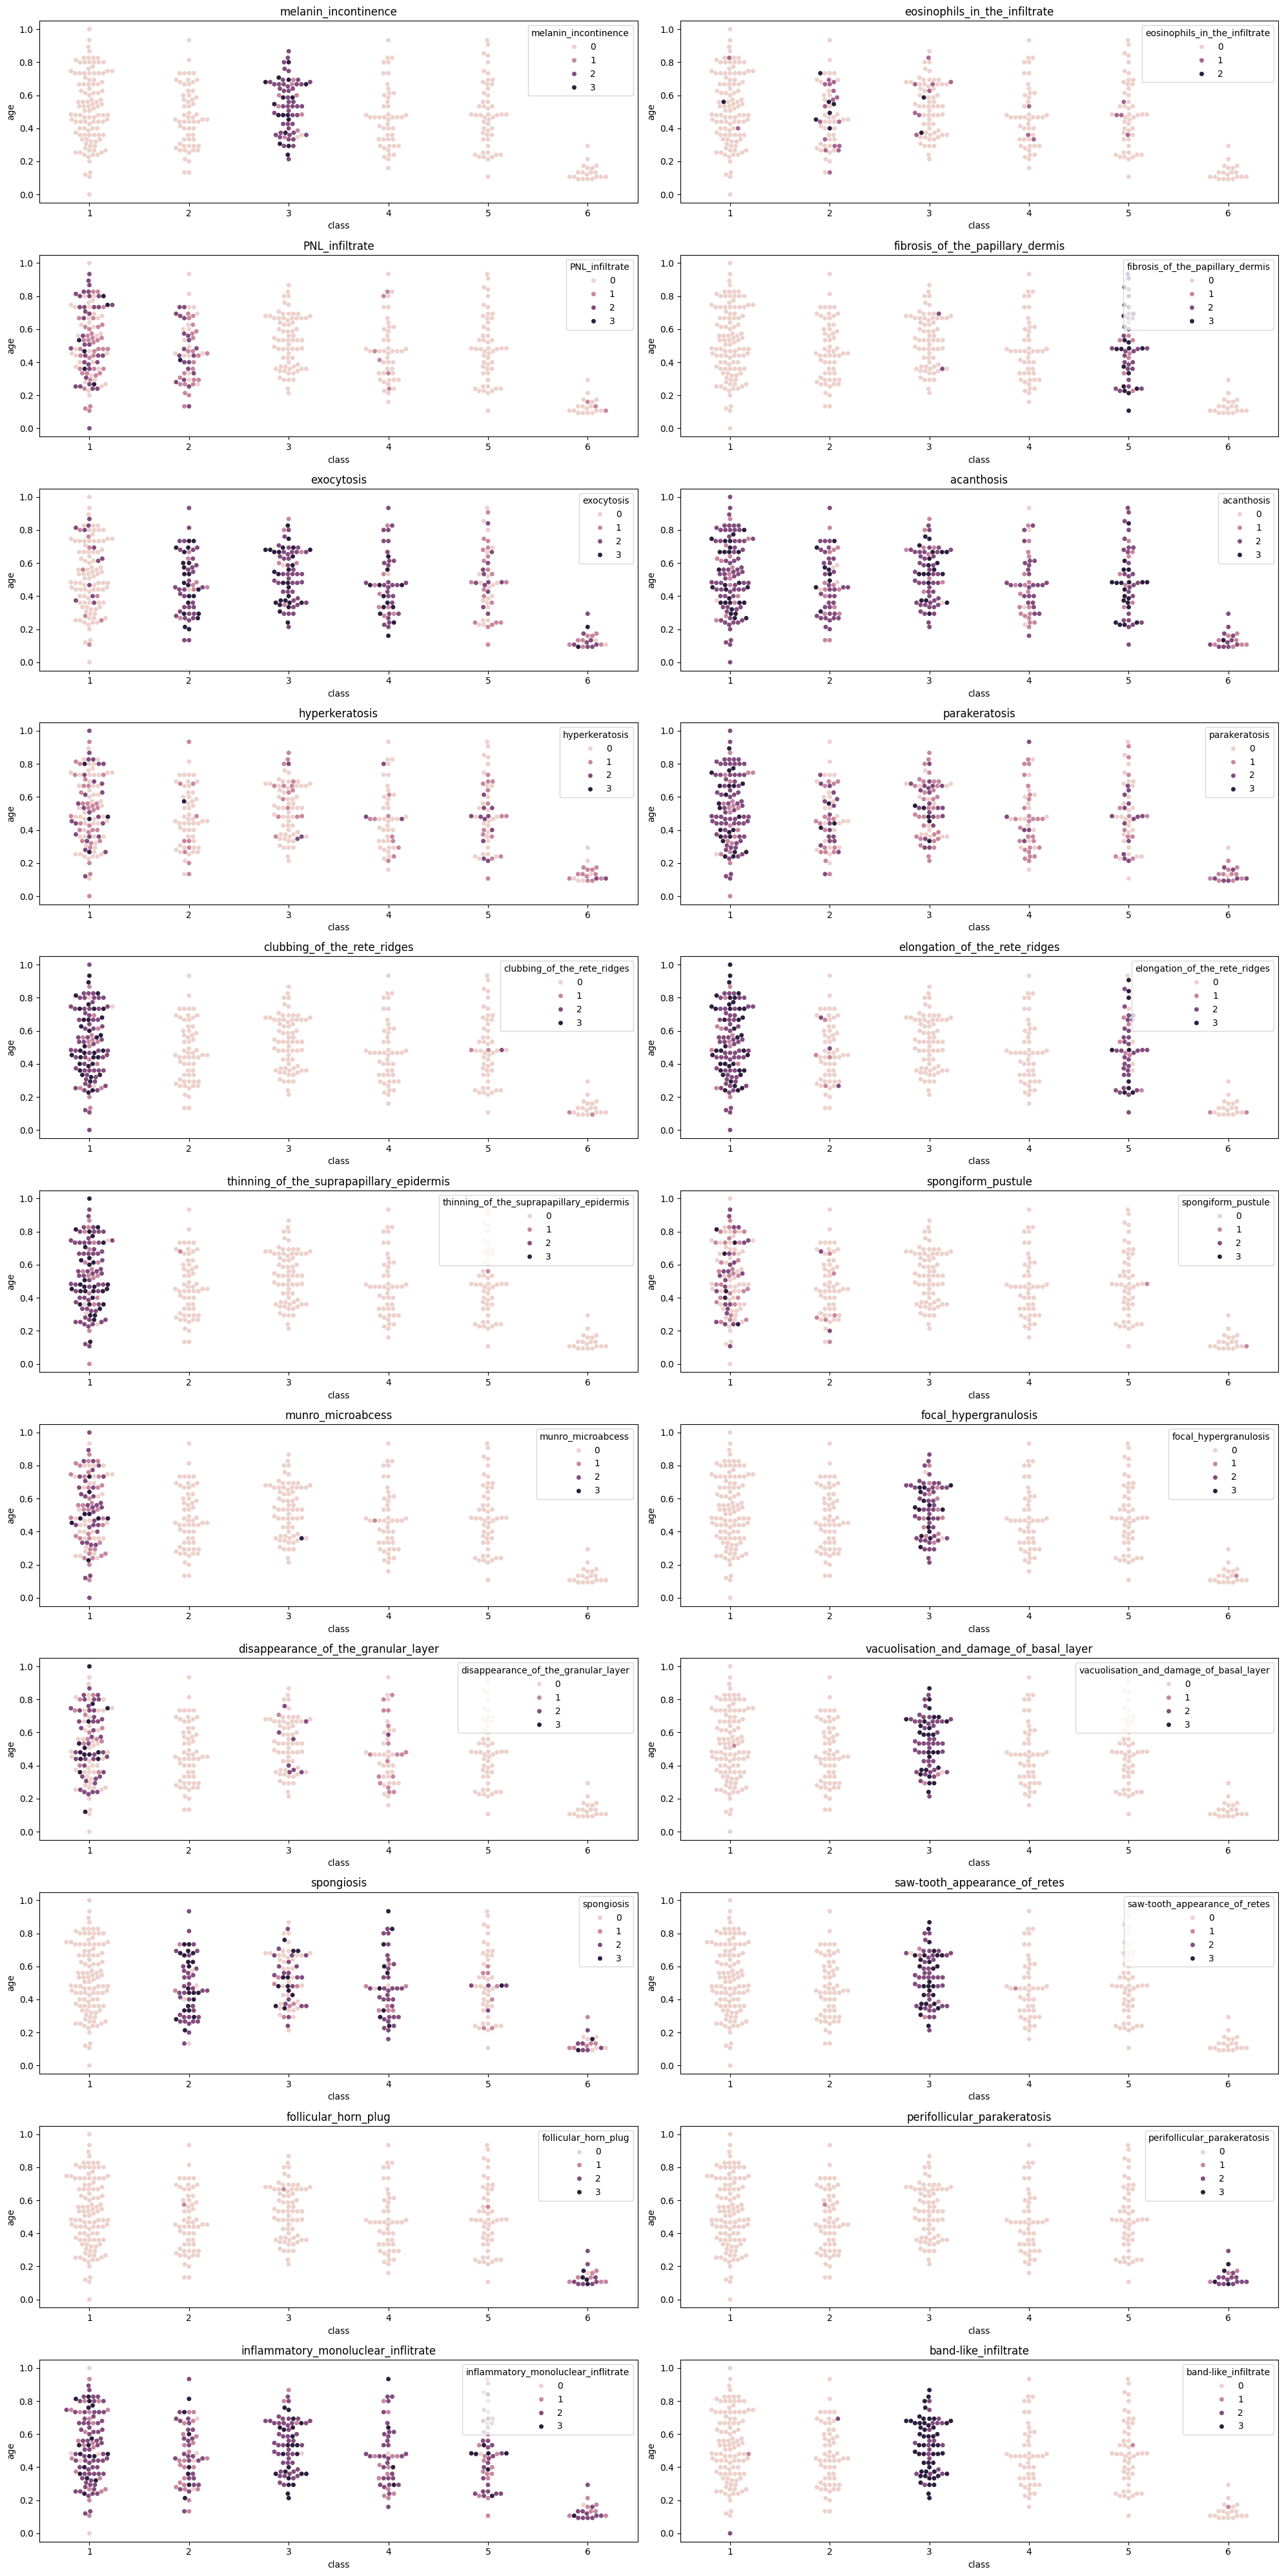

In [203]:
fig = plt.figure(figsize=(20,40))
for i,ele in enumerate(microscopic_attributes):
    ax = fig.add_subplot(11,2, i+1)
    ax.set_title(ele)
    sns.swarmplot(x = data["class"], y=data.age, hue=data[ele])

plt.tight_layout()
plt.show();

* acanthosis, parakeratosis and inflammatory monoluclear inflitrate are the attributes that are common to all the classes
* Microscopic readings give more clarity to differentiate classes of disorder compared to clinical attributes
* eosinophils in the infiltrate Dosent play significant important role identifying any disorder
* melanin incontinence is found only in lichen planus -> if melanin incontinence, the disorder is lichen planus
* 'clubbing_of_the_rete_ridges', 'thinning_of_the_suprapapillary_epidermis' and 'munro_microabcess' are only found in psoriasis
* 'follicular_horn_plug' and 'perifollicular_parakeratosis' are only found in "pityriasis rubra pilaris"

## Standardise age column

In [30]:
from sklearn.preprocessing import minmax_scale
data["age"] = minmax_scale(data.age)

In [31]:
data.age

0      0.733333
1      0.106667
2      0.346667
3      0.533333
4      0.600000
         ...   
361    0.333333
362    0.480000
363    0.373333
364    0.666667
365    0.466667
Name: age, Length: 366, dtype: float64

## Train-Test split

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
x = data.iloc[:,:-1]

In [35]:
y = data["class"]

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, stratify=data["class"])

## Model Training

Not balancing the data since this is a multiclass classifier.
using Precision, Recall, F1 Score, ROC-AUC (Area Under Curve), Confusion Matrix for evaluation

Algorithms applied on the dataset
* KNN Clasifier
* SVC
* Decission Tree
* Random Forest
* Gradient Boosting
* XGB
* Bagging

#### KNN

Importancs is given in order - recall, precision, f1_score, roc <br/>
Since this project is related to medicine, we do not want to False-Negative, we give more importance to recall

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, accuracy_score

In [38]:
knn_model = KNeighborsClassifier(n_neighbors= 10, weights='distance')

In [39]:
knn_model.fit(x_train, y_train, )

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [40]:
knn_y_true_hat = knn_model.predict(x_train)

In [41]:
print(accuracy_score(y_train, knn_y_true_hat, ))
print(precision_score(y_train, knn_y_true_hat, average="weighted" ))
print(recall_score(y_train, knn_y_true_hat,average="weighted"  ))
print(f1_score(y_train, knn_y_true_hat,average="weighted" ))

1.0
1.0
1.0
1.0


In [42]:
knn_y_hat = knn_model.predict(x_test)

In [43]:
print(accuracy_score(y_test, knn_y_hat, ))
print(precision_score(y_test, knn_y_hat, average="weighted" ))
print(recall_score(y_test, knn_y_hat,average="weighted"  ))
print(f1_score(y_test, knn_y_hat,average="weighted" ))

0.9864864864864865
0.9877149877149878
0.9864864864864865
0.9865144647753343


### SVC

In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [45]:
svc_model = SVC()

In [46]:
params = {
    "C": [0.1, 0.01, 0.001],
    "gamma": [0.1, 0.01,0.2],
    "kernel":['linear', 'poly', 'rbf', 'sigmoid'],
    "class_weight": ["balanced"]
}

In [47]:
gcv = GridSearchCV(svc_model, param_grid=params, scoring="recall", verbose=1, )

In [48]:
gcv.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 0.001], 'class_weight': ['balanced'],
                         'gamma': [0.1, 0.01, 0.2],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='recall', verbose=1)

In [49]:
svc_y_true_hat = gcv.predict(x_train)

In [50]:
print(accuracy_score(y_train, svc_y_true_hat, ))
print(precision_score(y_train, svc_y_true_hat, average="weighted" ))
print(recall_score(y_train, svc_y_true_hat,average="weighted"  ))
print(f1_score(y_train, svc_y_true_hat,average="weighted" ))

0.9897260273972602
0.9898259132420091
0.9897260273972602
0.9897380939186521


In [51]:
svc_y_hat = gcv.predict(x_test)

In [52]:
print(accuracy_score(y_test, svc_y_hat, ))
print(precision_score(y_test, svc_y_hat, average="weighted" ))
print(recall_score(y_test, svc_y_hat,average="weighted"  ))
print(f1_score(y_test, svc_y_hat,average="weighted" ))

0.9864864864864865
0.9875259875259875
0.9864864864864865
0.9864011379800853


### All models using pipeline and GridSearch

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier

In [106]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier

In [123]:
models = {
    "knn": {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [3, 5, 7],
        'model__weights': ['uniform', 'distance'],
        "model__n_jobs": [-1]
    },
    "SVC": {
        'model': [SVC()],
        "model__C": [0.1, 0.01, 0.001],
        "model__gamma": [0.1, 0.01,0.2],
        "model__kernel":['linear', 'poly', 'rbf', 'sigmoid'],
        "model__class_weight": ["balanced"]
    },
    "Decission Tree": {
        'model': [DecisionTreeClassifier()],
        "model__max_depth": np.random.randint(2,50, 5),
        "model__min_samples_split": np.random.randint(2,50, 5),
        "model__max_leaf_nodes":np.random.randint(2,50, 5),
        "model__class_weight": ["balanced"]
    },
    "Random Forest": {
        'model': [RandomForestClassifier()],
        "model__n_estimators": np.random.randint(10,100, 3),
        "model__max_depth": np.random.randint(2,50, 3),
        "model__min_samples_split": np.random.randint(2,50, 3),
        "model__max_leaf_nodes":np.random.randint(2,50, 3),
        "model__class_weight": ["balanced"],
        "model__n_jobs": [-1]
    },
    "Gradient Boosting": {
        'model': [GradientBoostingClassifier()],
        "model__learning_rate": [0.1, 0.01, 0.3, 0.001],
        "model__n_estimators": np.random.randint(10,100, 3),
        "model__max_depth": np.random.randint(2,50, 3),
        "model__min_samples_split": np.random.randint(2,50, 3),
        "model__max_leaf_nodes":np.random.randint(2,50, 3),
        "model__max_features":['sqrt', 'log2']
    },
    "Bagging classifier": {
        'model': [BaggingClassifier()],
        "model__estimator": [DecisionTreeClassifier()],
        "model__n_estimators": np.random.randint(5,50, 5),
        "model__bootstrap":[True, False],
        "model__n_jobs": [-1]
    },
    "XGB": {
        'model': [XGBClassifier()],
        "model__device":["cuda"],
        "model__max_depth": np.random.randint(2,50, 5),
    }
}

In [124]:
pipeline = Pipeline([("model", DummyClassifier())])

In [125]:
pipeline

Pipeline(steps=[('model', DummyClassifier())])

In [215]:
result = []
for model_name, model_params in models.items():
    grid = GridSearchCV(pipeline, param_grid = model_params, scoring="recall_macro", n_jobs=-1, verbose = 3, cv=3)
    train_hat = train_recall_score = test_hat = test_recall_score = None
    if model_name == "XGB":
        grid.fit(x_train, y_train - 1)
        
        train_hat = grid.predict(x_train)
        train_recall_score = recall_score(y_train, train_hat+1, average="weighted")       
        train_f1_score = f1_score(y_train, train_hat+1, average="weighted")
        
        test_hat = grid.predict(x_test)
        test_recall_score = recall_score(y_test, test_hat+1, average="weighted")
        test_f1_score = f1_score(y_test, test_hat+1, average="weighted")
        
    else:
        grid.fit(x_train, y_train)
    
        train_hat = grid.predict(x_train)
        train_recall_score = recall_score(y_train, train_hat, average="weighted")
        train_f1_score = f1_score(y_train, train_hat, average="weighted")
    
        test_hat = grid.predict(x_test)
        test_recall_score = recall_score(y_test, test_hat, average="weighted")
        test_f1_score = f1_score(y_test, test_hat, average="weighted")
        
    result.append({'model':model_name, 
                   "time_taken": grid.cv_results_['mean_fit_time'].mean(),
                   "best_params":grid.best_params_, 
                   "train_recall_score": train_recall_score,
                   "test_recall_score": test_recall_score,
                   "train_f1_score": train_f1_score,
                   "test_f1_score": test_f1_score})


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 125 candidates, totalling 375 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [216]:
grid.cv_results_['mean_fit_time'].mean()

17.610276683171588

In [217]:
result_df = pd.DataFrame(result)

In [218]:
result_df

,model,time_taken,best_params,train_recall_score,test_recall_score,train_f1_score,test_f1_score
0,knn,0.004446,"{'model': KNeighborsClassifier(), 'model__n_jo...",0.989726,0.986486,0.989738,0.986401
1,SVC,0.010308,"{'model': SVC(), 'model__C': 0.1, 'model__clas...",0.989726,0.986486,0.989738,0.986401
2,Decission Tree,0.006396,"{'model': DecisionTreeClassifier(), 'model__cl...",0.989726,0.918919,0.989701,0.920204
3,Random Forest,0.216452,"{'model': RandomForestClassifier(), 'model__cl...",0.996575,0.986486,0.996579,0.986401
4,Gradient Boosting,0.509599,"{'model': GradientBoostingClassifier(), 'model...",1.000000,0.972973,1.000000,0.972511
5,Bagging classifier,0.160870,"{'model': BaggingClassifier(), 'model__bootstr...",1.000000,0.945946,1.000000,0.945731
6,XGB,17.610277,"{'model': XGBClassifier(base_score=None, boost...",1.000000,0.972973,1.000000,0.972511


In [224]:
result_df["recall_diff"] = np.abs(result_df.train_recall_score - result_df.test_recall_score)

In [223]:
result_df["f1_diff"] = np.abs(result_df.train_f1_score - result_df.test_f1_score)

In [225]:
result_df

,model,time_taken,best_params,train_recall_score,test_recall_score,train_f1_score,test_f1_score,recall_diff,f1_diff
0,knn,0.004446,"{'model': KNeighborsClassifier(), 'model__n_jo...",0.989726,0.986486,0.989738,0.986401,0.003240,0.003337
1,SVC,0.010308,"{'model': SVC(), 'model__C': 0.1, 'model__clas...",0.989726,0.986486,0.989738,0.986401,0.003240,0.003337
2,Decission Tree,0.006396,"{'model': DecisionTreeClassifier(), 'model__cl...",0.989726,0.918919,0.989701,0.920204,0.070807,0.069497
3,Random Forest,0.216452,"{'model': RandomForestClassifier(), 'model__cl...",0.996575,0.986486,0.996579,0.986401,0.010089,0.010178
4,Gradient Boosting,0.509599,"{'model': GradientBoostingClassifier(), 'model...",1.000000,0.972973,1.000000,0.972511,0.027027,0.027489
5,Bagging classifier,0.160870,"{'model': BaggingClassifier(), 'model__bootstr...",1.000000,0.945946,1.000000,0.945731,0.054054,0.054269
6,XGB,17.610277,"{'model': XGBClassifier(base_score=None, boost...",1.000000,0.972973,1.000000,0.972511,0.027027,0.027489


### Running SVC on entire data

In [232]:
result_df["best_params"][1]

{'model': SVC(),
 'model__C': 0.1,
 'model__class_weight': 'balanced',
 'model__gamma': 0.1,
 'model__kernel': 'linear'}

In [233]:
svc_model = SVC(C=0.1, class_weight="balanced", gamma=0.1, kernel="linear")

In [234]:
svc_model.fit(x,y)

SVC(C=0.1, class_weight='balanced', gamma=0.1, kernel='linear')

In [235]:
import pickle

with open("svc_model.pkl", "wb") as file:
    pickle.dump(svc_model, file)

### Conclusion
1. KNN and SVC
   * Low recall & f1 score
   * No over fitting
   * Simple algorithms
2. Random Forest
   * Slightly better performance
   * No overfitting
   * High training time
3. Gradient boosting, XGB, Decission Tree and Bagging Classifier
   * Overfitting
   * High training time
   * Complecity is not worthy

#### Recommendations
* use SVC or KNN for better performance in terms or traning time, accuracy and overfitting
* if data scale is high, use XGB since it makes use of cuda cores

### Challenges faced
* Executing a generalised pipeline for a list of models would be stright forward, in this case we had to note the time taken, recall score and f1-score of each model while executing was a bit of challenge. A bit of research helped me overcome this challenge.
* Having more number of combination in GridSearch cv would have increased the time consumption. Alternatively could have used Random search CV or run without hyperparameter
* 